In [96]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as smf 
import numpy as np 
from statsmodels.graphics.regressionplots import influence_plot
import warnings 
warnings.filterwarnings('ignore') 

In [97]:
toyotacorrola=pd.read_csv('ToyotaCorolla.csv', encoding='unicode_escape')
toyotacorrola 

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


In [98]:
toyotacorrola[['Model','Fuel_Type','Color']]=toyotacorrola[['Model','Fuel_Type','Color']].apply(lambda x: pd.factorize(x)[0])
toyotacorrola[['Model','Fuel_Type','Color']]

,Model,Fuel_Type,Color
0,0,0,0
1,0,0,1
2,1,0,0
3,0,0,2
4,2,0,2
...,...,...,...
1431,213,1,0
1432,230,1,4
1433,230,1,0
1434,230,1,4


In [99]:
toyotacorrola

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,0,13500,23,10,2002,46986,0,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,0,13750,23,10,2002,72937,0,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,1,13950,24,9,2002,41711,0,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,0,14950,26,7,2002,48000,0,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,2,13750,30,3,2002,38500,0,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,213,7500,69,12,1998,20544,1,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,230,10845,72,9,1998,19000,1,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,230,8500,71,10,1998,17016,1,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,230,7250,70,11,1998,16916,1,86,1,...,0,0,0,0,0,0,1,0,0,0


In [100]:
toyotacorrola=toyotacorrola.rename({'Age_08_04':'Age'},axis=1)
toyotacorrola 

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,0,13500,23,10,2002,46986,0,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,0,13750,23,10,2002,72937,0,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,1,13950,24,9,2002,41711,0,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,0,14950,26,7,2002,48000,0,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,2,13750,30,3,2002,38500,0,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,213,7500,69,12,1998,20544,1,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,230,10845,72,9,1998,19000,1,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,230,8500,71,10,1998,17016,1,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,230,7250,70,11,1998,16916,1,86,1,...,0,0,0,0,0,0,1,0,0,0


In [101]:
toyotacorrola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Id                1436 non-null   int64
 1   Model             1436 non-null   int64
 2   Price             1436 non-null   int64
 3   Age               1436 non-null   int64
 4   Mfg_Month         1436 non-null   int64
 5   Mfg_Year          1436 non-null   int64
 6   KM                1436 non-null   int64
 7   Fuel_Type         1436 non-null   int64
 8   HP                1436 non-null   int64
 9   Met_Color         1436 non-null   int64
 10  Color             1436 non-null   int64
 11  Automatic         1436 non-null   int64
 12  cc                1436 non-null   int64
 13  Doors             1436 non-null   int64
 14  Cylinders         1436 non-null   int64
 15  Gears             1436 non-null   int64
 16  Quarterly_Tax     1436 non-null   int64
 17  Weight            1436 non-null  

In [102]:
toyotacorrola.isna().sum()

Id                  0
Model               0
Price               0
Age                 0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Color               0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [103]:
toyotacorrola.corr() 

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,1.000000,0.708340,-0.738250,0.906132,0.043742,-0.919523,0.273298,0.134916,-0.109375,-0.079713,...,-0.238940,-0.236723,-0.091587,-0.010971,-0.139708,-0.028704,-0.136398,-0.022232,-0.011611,0.159171
Model,0.708340,1.000000,-0.647280,0.732227,-0.009585,-0.734897,0.312592,0.107151,-0.203473,-0.088295,...,-0.175087,-0.166066,-0.129459,0.042364,-0.077010,-0.199967,-0.395009,-0.009576,0.039232,0.129231
Price,-0.738250,-0.647280,1.000000,-0.876590,-0.018138,0.885159,-0.569960,-0.063339,0.314990,0.108905,...,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age,0.906132,0.732227,-0.876590,1.000000,-0.123255,-0.983661,0.505672,0.091999,-0.156622,-0.108150,...,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,0.043742,-0.009585,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.047646,-0.039312,0.030266,...,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,-0.919523,-0.734897,0.885159,-0.983661,-0.057416,1.000000,-0.504974,-0.083909,0.164697,0.103310,...,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,0.273298,0.312592,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.329327,-0.333538,-0.080503,...,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
Fuel_Type,0.134916,0.107151,-0.063339,0.091999,-0.047646,-0.083909,-0.329327,1.000000,0.518078,0.018426,...,0.046901,0.082544,-0.015257,0.001073,0.069317,-0.007224,0.021343,0.084368,0.000505,0.062395
HP,-0.109375,-0.203473,0.314990,-0.156622,-0.039312,0.164697,-0.333538,0.518078,1.000000,0.058712,...,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,-0.079713,-0.088295,0.108905,-0.108150,0.030266,0.103310,-0.080503,0.018426,0.058712,1.000000,...,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536


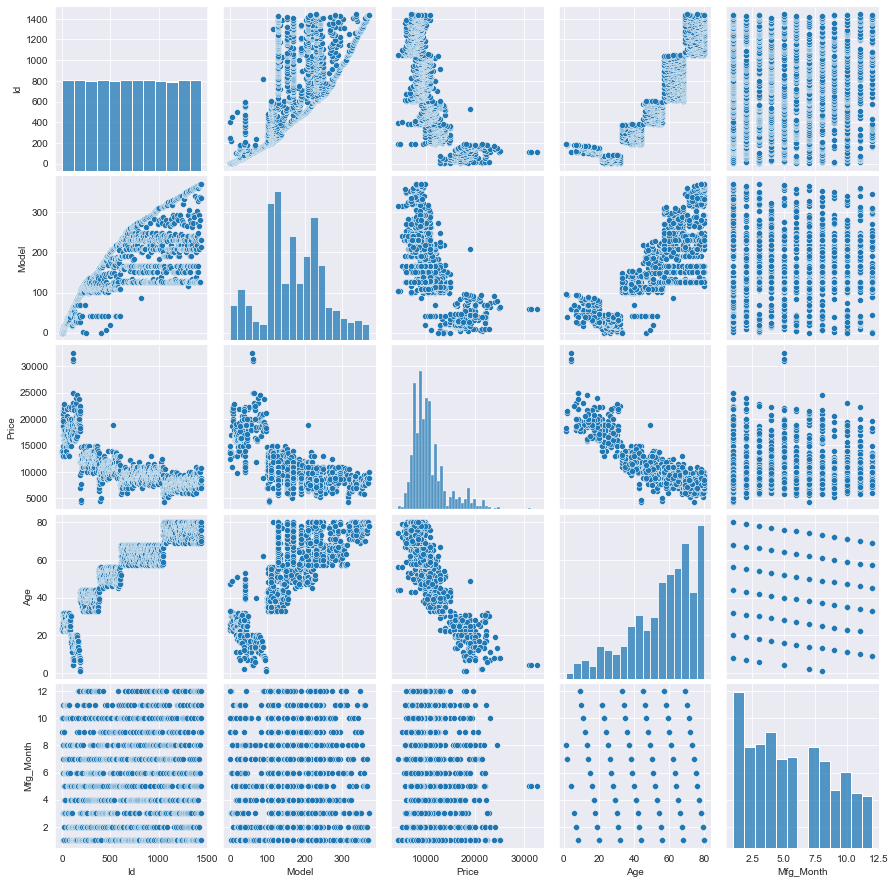

In [104]:
#Format the plot background[darkgrid] & scatterplot for all variables
sns.set_style(style='darkgrid')
sns.pairplot(toyotacorrola.iloc[:,0:5])  

In [105]:
#Prepairing a Model
model_0=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit()
model_0 

In [106]:
#Check the R-squared, P- values of independent variables & Adj. R-squared values
model_0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1131.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        08:26:46   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1427   BIC:                         2.482e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5573.1064   1411.390     -3.949      0.000   -8341.728   -2804.485
Age            -121.6584      2.616    -46.512      0.000    -126.789    -116.527
KM               -0.0208      0.001    -16.622      0.000      -0.023      -0.018
HP               31.6809      2.818     11.241      0.000      26.152      37.209
cc               -0.1211      0.090     -1.344      0.179      -0.298       0.056
Doors            -1.6166     40.006     -0.040      0.968     -80.093      76.859
Gears           594.3199    197.055      3.016      0.003     207.771     980.869
Quarterly_Tax     3.9491      1.310      3.015      0.003       1.379       6.519
Weight           16.9586      1.068     15.880      0.000      14.864      19.054
==============================================================================
Omnibus:                      151.719   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1011.853
Skew:                          -0.219   Prob(JB):                    1.90e-220
Kurtosis:                       7.089   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [107]:
#Prepairing a Model
model1=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit()
model1

In [108]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1508.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        08:27:07   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1429   BIC:                         2.480e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5478.4778   1408.562     -3.889      0.000   -8241.548   -2715.407
Age            -121.6999      2.615    -46.534      0.000    -126.830    -116.570
KM               -0.0209      0.001    -16.769      0.000      -0.023      -0.018
HP               31.3269      2.799     11.191      0.000      25.836      36.818
Gears           598.9653    193.441      3.096      0.002     219.507     978.424
Quarterly_Tax     3.7371      1.296      2.883      0.004       1.194       6.280
Weight           16.7251      1.020     16.393      0.000      14.724      18.726
==============================================================================
Omnibus:                      147.966   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              966.959
Skew:                          -0.207   Prob(JB):                    1.07e-210
Kurtosis:                       6.999   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
#Simple linear Regression Concepts check the insignificant variables are truely insignificant or not for prediction based on build a model individualy with target variables
model_cc= smf.ols('Price~cc',data= toyotacorrola).fit()
model_cc 

In [110]:
model_cc.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.015
Method:                 Least Squares   F-statistic:                     23.28
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.55e-06
Time:                        08:27:15   Log-Likelihood:                -13795.
No. Observations:                1436   AIC:                         2.759e+04
Df Residuals:                    1434   BIC:                         2.760e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9027.5548    365.576     24.694      0.000    8310.435    9744.675
cc             1.0802      0.224      4.825      0.000       0.641       1.519
==============================================================================
Omnibus:                      465.181   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1390.401
Skew:                           1.649   Prob(JB):                    1.20e-302
Kurtosis:                       6.516   Cond. No.                     6.29e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [111]:
model_Doors= smf.ols('Price~Doors',data= toyotacorrola).fit()
model_Doors 

In [112]:
model_Doors.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     51.00
Date:                Thu, 26 May 2022   Prob (F-statistic):           1.46e-12
Time:                        08:27:19   Log-Likelihood:                -13782.
No. Observations:                1436   AIC:                         2.757e+04
Df Residuals:                    1434   BIC:                         2.758e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7885.0058    409.438     19.258      0.000    7081.843    8688.168
Doors        705.5586     98.795      7.142      0.000     511.761     899.356
==============================================================================
Omnibus:                      466.779   Durbin-Watson:                   0.287
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1406.209
Skew:                           1.651   Prob(JB):                    4.42e-306
Kurtosis:                       6.549   Cond. No.                         19.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
model2= smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight+cc',data= toyotacorrola).fit()
model2 

In [114]:
model2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1293.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        08:27:30   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5575.1401   1409.999     -3.954      0.000   -8341.032   -2809.248
Age            -121.6581      2.615    -46.528      0.000    -126.787    -116.529
KM               -0.0208      0.001    -16.636      0.000      -0.023      -0.018
HP               31.6728      2.810     11.270      0.000      26.160      37.186
Gears           595.8324    193.400      3.081      0.002     216.453     975.212
Quarterly_Tax     3.9531      1.306      3.027      0.003       1.391       6.515
Weight           16.9478      1.033     16.401      0.000      14.921      18.975
cc               -0.1210      0.090     -1.344      0.179      -0.298       0.056
==============================================================================
Omnibus:                      151.495   Durbin-Watson:                   1.543
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1009.287
Skew:                          -0.218   Prob(JB):                    6.86e-220
Kurtosis:                       7.084   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [115]:
model3= smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight+Doors',data= toyotacorrola).fit()
model3  

In [116]:
model3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     1291.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        08:27:37   Log-Likelihood:                -12376.
No. Observations:                1436   AIC:                         2.477e+04
Df Residuals:                    1428   BIC:                         2.481e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -5477.5069   1409.995     -3.885      0.000   -8243.391   -2711.623
Age            -121.7000      2.616    -46.518      0.000    -126.832    -116.568
KM               -0.0209      0.001    -16.756      0.000      -0.023      -0.018
HP               31.3306      2.807     11.161      0.000      25.824      36.837
Gears           598.2602    197.089      3.035      0.002     211.645     984.875
Quarterly_Tax     3.7352      1.301      2.872      0.004       1.184       6.287
Weight           16.7301      1.055     15.864      0.000      14.661      18.799
Doors            -0.7545     40.012     -0.019      0.985     -79.243      77.734
==============================================================================
Omnibus:                      148.064   Durbin-Watson:                   1.540
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              968.063
Skew:                          -0.208   Prob(JB):                    6.13e-211
Kurtosis:                       7.001   Cond. No.                     3.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [117]:
# Cal. Variance Inflation Factor Value for cc & Doors variables
rsq_cc= smf.ols('cc~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_cc= 1/(1-rsq_cc)

rsq_Doors= smf.ols('Doors~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_Doors= 1/(1-rsq_Doors)

rsq_Age= smf.ols('Age~Doors+KM+HP+cc+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_Age= 1/(1-rsq_Age)

rsq_KM= smf.ols('KM~Doors+Age+HP+cc+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_KM= 1/(1-rsq_KM)

rsq_HP= smf.ols('HP~Doors+Age+KM+cc+Gears+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_HP= 1/(1-rsq_HP)

rsq_Gears= smf.ols('Gears~Doors+Age+KM+cc+HP+Quarterly_Tax+Weight',data= toyotacorrola).fit().rsquared
vif_Gears= 1/(1-rsq_Gears)

rsq_Quarterly_Tax= smf.ols('Quarterly_Tax~Doors+Age+KM+cc+HP+Gears+Weight',data= toyotacorrola).fit().rsquared
vif_Quarterly_Tax= 1/(1-rsq_Quarterly_Tax)

rsq_Weight= smf.ols('Weight~Doors+Age+KM+cc+HP+Gears+Quarterly_Tax',data= toyotacorrola).fit().rsquared
vif_Weight= 1/(1-rsq_Weight)


# Storing VIF Values in a dataframe
d1= {'Variables':['cc','Doors','Age','KM','HP','Gears','Quarterly_Tax','Weight'],'VIF':[vif_cc,vif_Doors,vif_Age,vif_KM,vif_HP,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame= pd.DataFrame(d1)
Vif_frame 

,Variables,VIF
0,cc,1.163894
1,Doors,1.156575
2,Age,1.884620
3,KM,1.756905
4,HP,1.419422
5,Gears,1.098723
6,Quarterly_Tax,2.311431
7,Weight,2.516420


In [118]:
# Build model after removing insignificant variables [Weight]
model4=smf.ols('Price~Age+KM+HP+cc+Doors+Gears+Quarterly_Tax',data= toyotacorrola).fit()
model4  

In [119]:
model4.summary( ) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     1069.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        08:27:57   Log-Likelihood:                -12492.
No. Observations:                1436   AIC:                         2.500e+04
Df Residuals:                    1428   BIC:                         2.504e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      9980.6587   1101.951      9.057      0.000    7819.042    1.21e+04
Age            -136.3855      2.652    -51.426      0.000    -141.588    -131.183
KM               -0.0201      0.001    -14.793      0.000      -0.023      -0.017
HP               43.5743      2.946     14.790      0.000      37.795      49.354
cc                0.1066      0.096      1.106      0.269      -0.083       0.296
Doors           157.9483     41.991      3.762      0.000      75.578     240.318
Gears           620.1432    213.676      2.902      0.004     200.990    1039.296
Quarterly_Tax    16.1981      1.148     14.108      0.000      13.946      18.450
==============================================================================
Omnibus:                      211.411   Durbin-Watson:                   1.371
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              765.784
Skew:                           0.690   Prob(JB):                    5.15e-167
Kurtosis:                       6.301   Cond. No.                     2.28e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.28e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [120]:
model5=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax',data= toyotacorrola).fit()
model5 

In [27]:
model5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     1479.
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        07:55:51   Log-Likelihood:                -12500.
No. Observations:                1436   AIC:                         2.501e+04
Df Residuals:                    1430   BIC:                         2.504e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.135e+04   1050.796     10.803      0.000    9289.988    1.34e+04
Age            -137.5635      2.647    -51.963      0.000    -142.757    -132.370
KM               -0.0197      0.001    -14.535      0.000      -0.022      -0.017
HP               45.7220      2.896     15.787      0.000      40.041      51.403
Gears           459.3703    210.568      2.182      0.029      46.314     872.427
Quarterly_Tax    16.9746      1.105     15.363      0.000      14.807      19.142
==============================================================================
Omnibus:                      210.953   Durbin-Watson:                   1.376
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              740.743
Skew:                           0.698   Prob(JB):                    1.41e-161
Kurtosis:                       6.230   Cond. No.                     2.16e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.16e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [121]:
#Residual Plot
#Q-Q Plot
import statsmodels.api as sma 

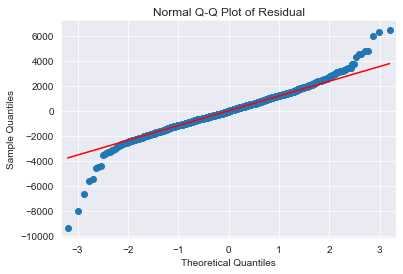

In [122]:
qqplot=sma.qqplot(model_0.resid,line='q')
plt.title("Normal Q-Q Plot of Residual")
plt.show() 

In [123]:
#Residual Plot for HOMOSCEDASTICITY

In [124]:
#Standardized the data(Z-Score) before plotting Residual plot
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

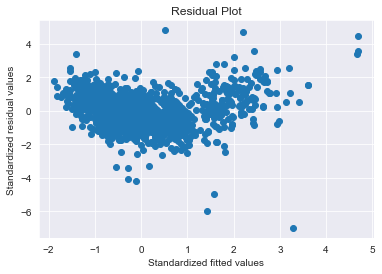

In [125]:
plt.scatter(get_standardized_values(model_0.fittedvalues),
            get_standardized_values(model_0.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized fitted values')
plt.ylabel('Standardized residual values')
plt.show() 

In [126]:
#Residual Vs Regressors

eval_env: 1


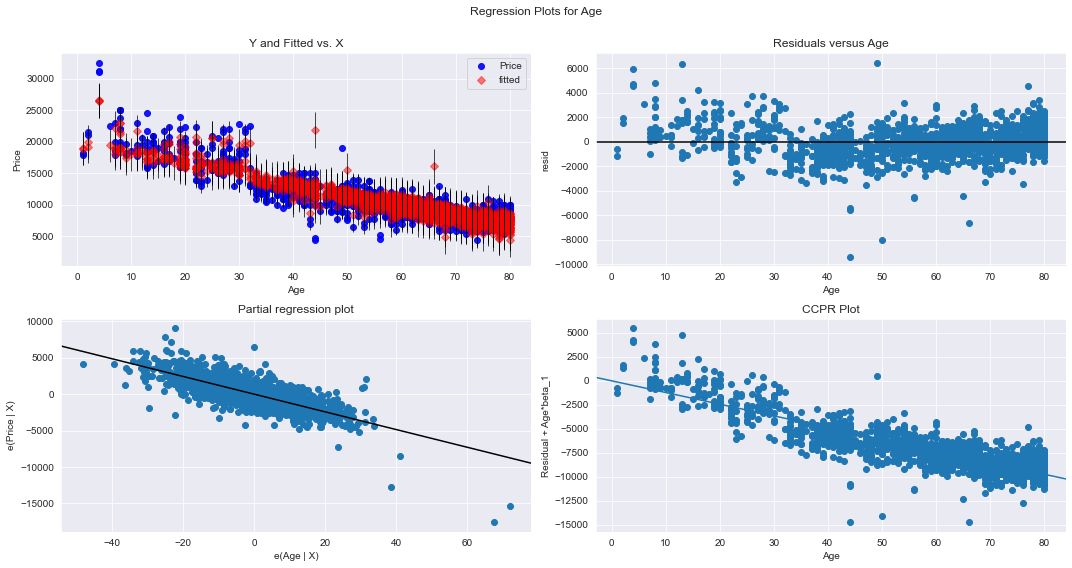

In [127]:
#Age
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"Age",fig=fig)
plt.show() 

eval_env: 1


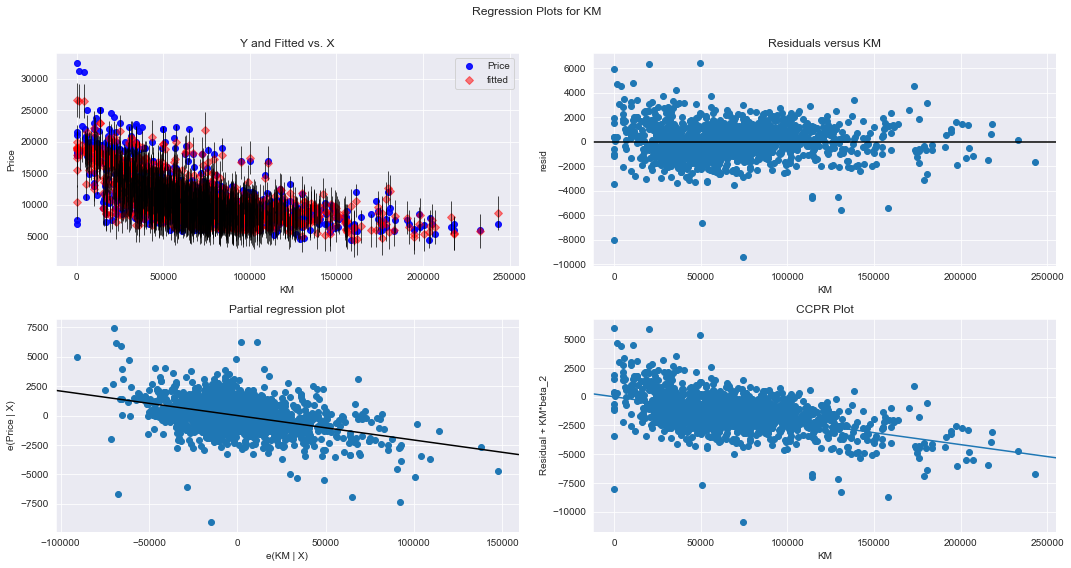

In [128]:
#KM
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"KM",fig=fig)
plt.show() 

eval_env: 1


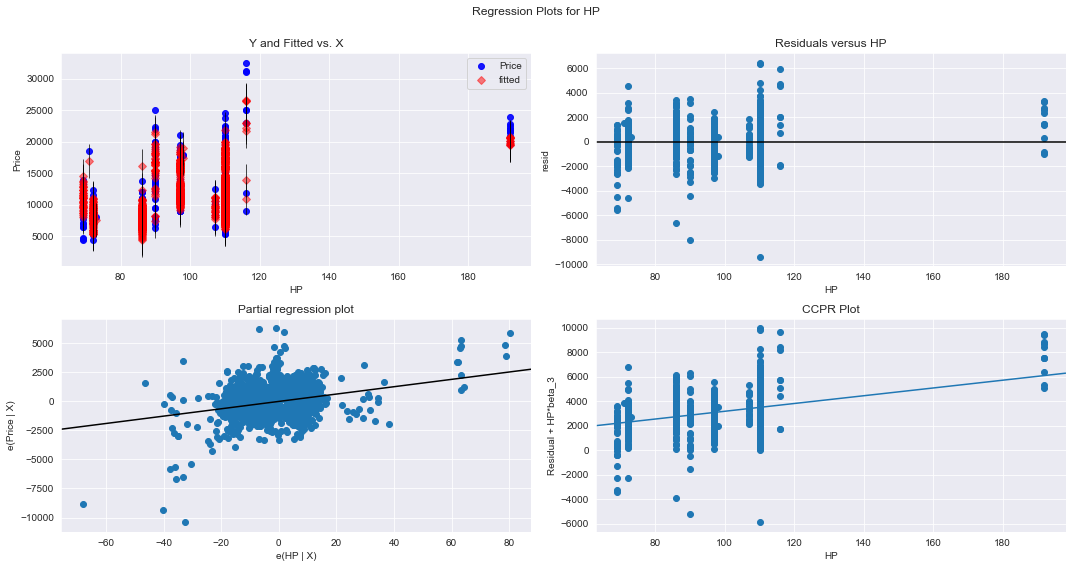

In [129]:
#HP
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"HP",fig=fig)
plt.show() 

eval_env: 1


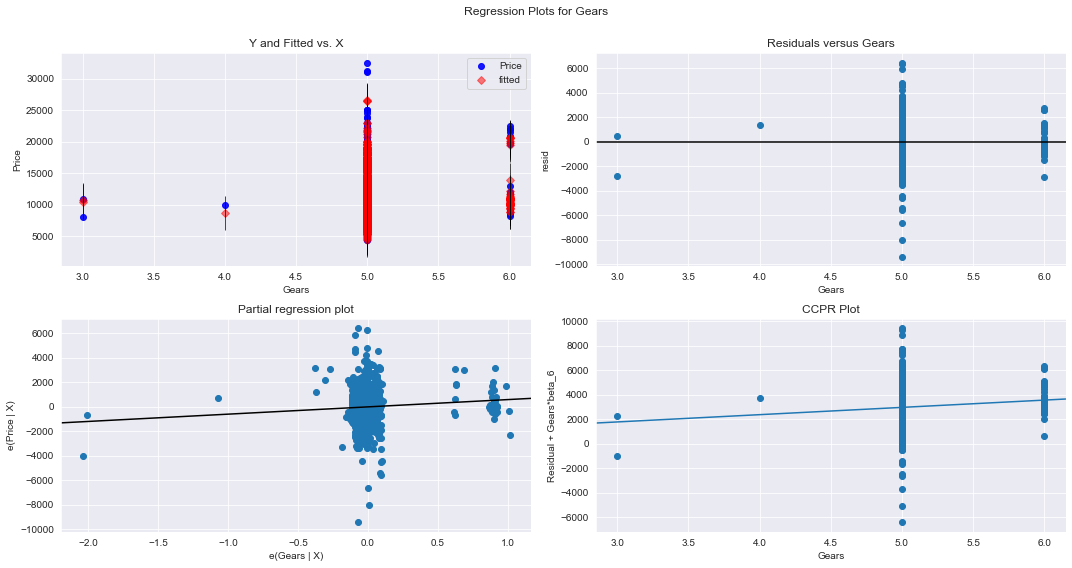

In [130]:
#Gears
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"Gears",fig=fig)
plt.show() 

eval_env: 1


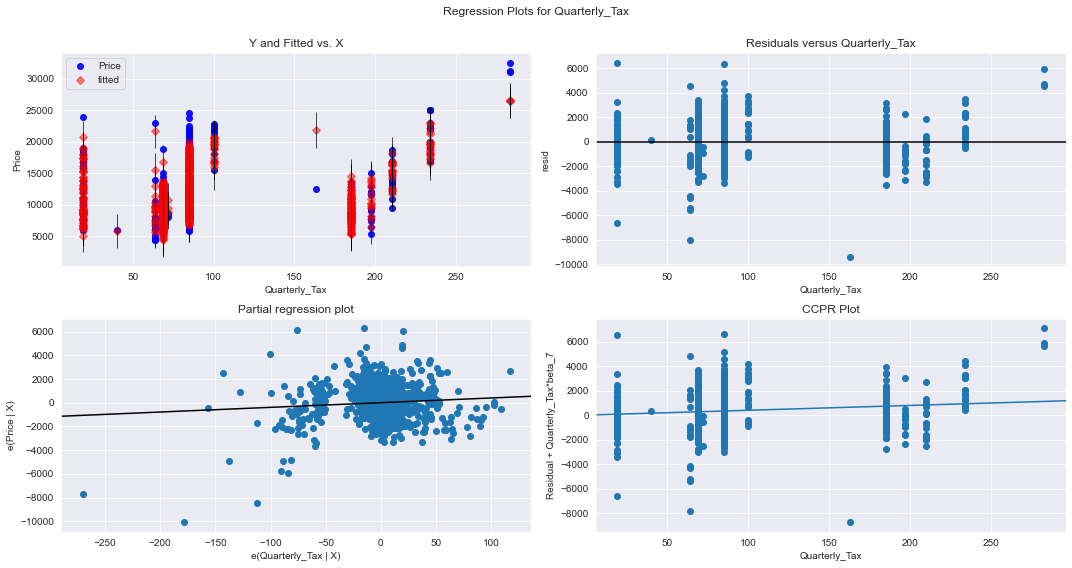

In [131]:
#Quarterly_Tax
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"Quarterly_Tax",fig=fig)
plt.show() 

eval_env: 1


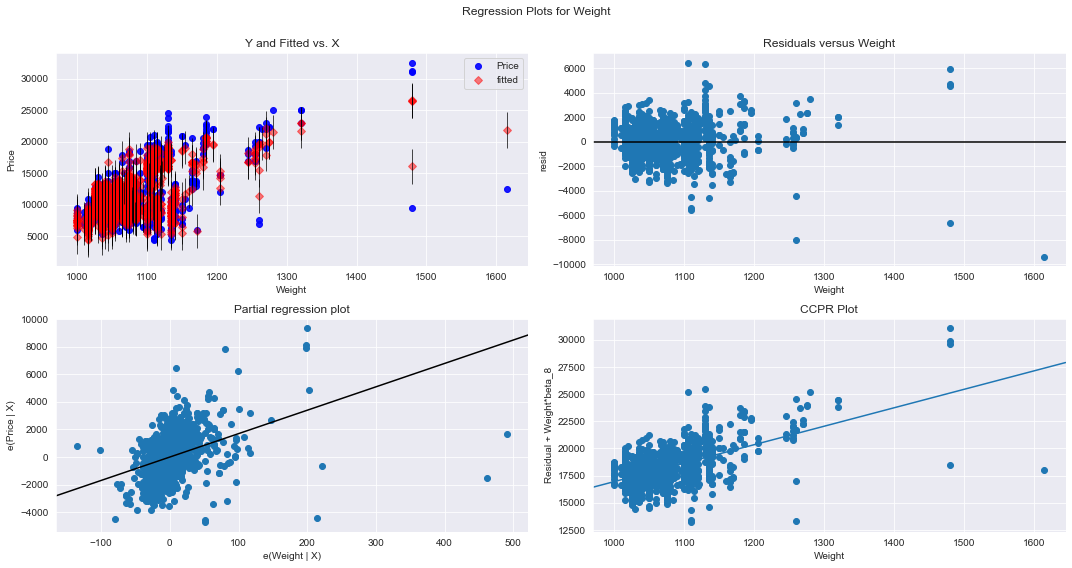

In [132]:
#Weight
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"Weight",fig=fig)
plt.show() 

eval_env: 1


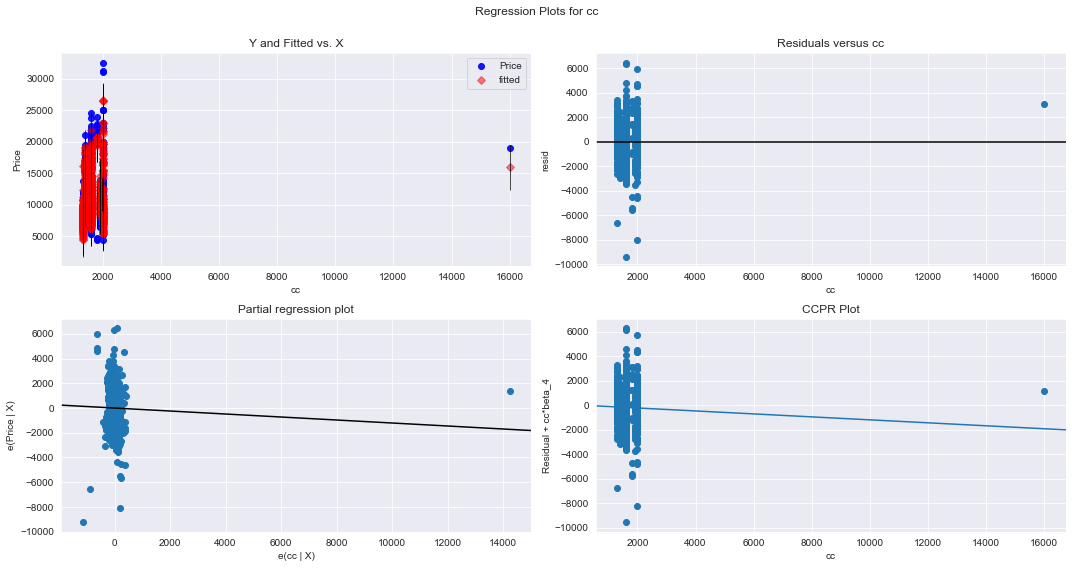

In [133]:
#cc
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"cc",fig=fig)
plt.show() 

eval_env: 1


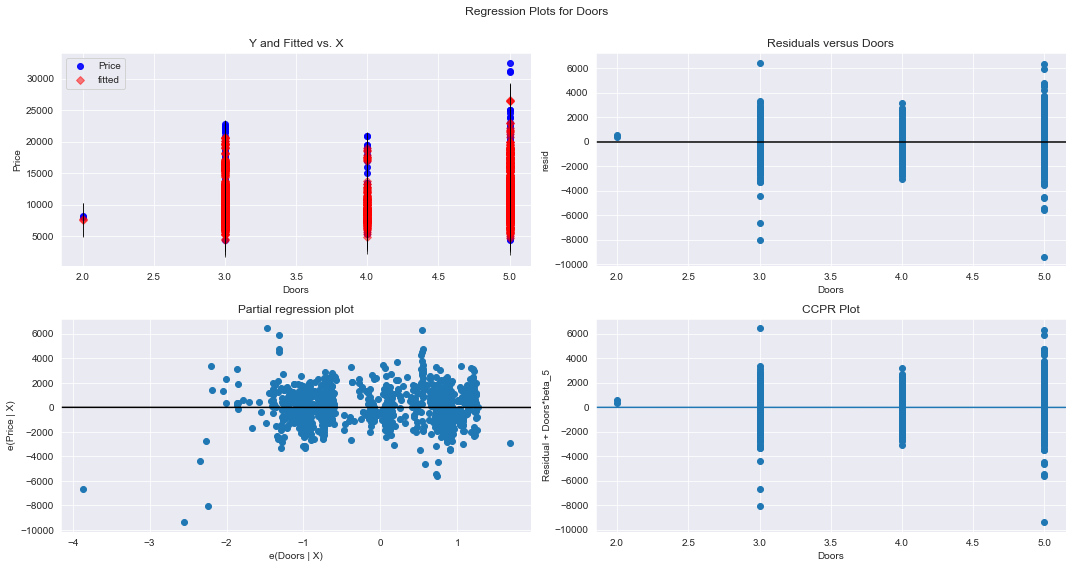

In [134]:
#Doors
fig=plt.figure(figsize=(15,8))
fig=sma.graphics.plot_regress_exog(model_0,"Doors",fig=fig)
plt.show() 

In [135]:
#MODEL DELETION DIAGNOSTICS 

In [136]:
#COOK'S DISTANCE
model_0influence = model_0.get_influence()
(c, _) = model_0influence.cooks_distance 

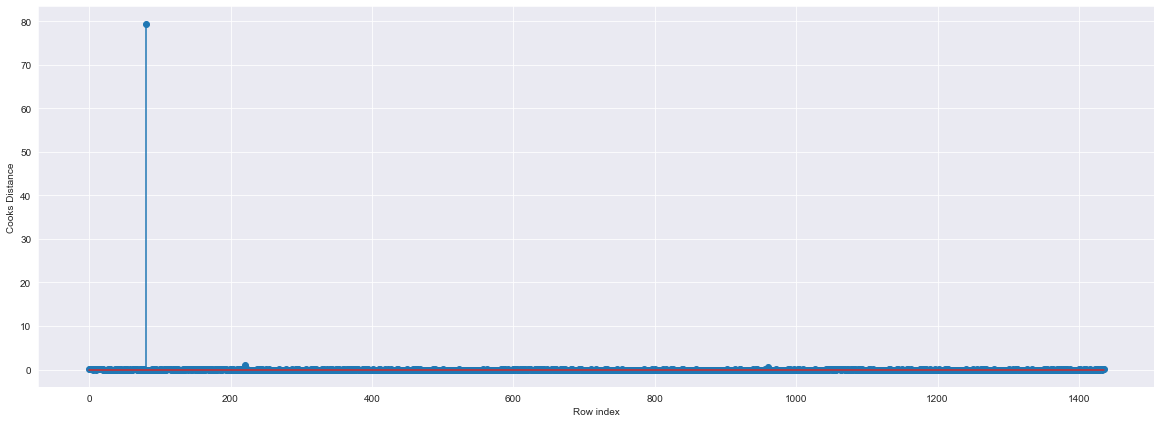

In [137]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(toyotacorrola)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [138]:
#index and value of influencer
(np.argmax(c),np.max(c))

(80, 79.5201062414142)

In [139]:
#HIGH INFLUENCE POINTS

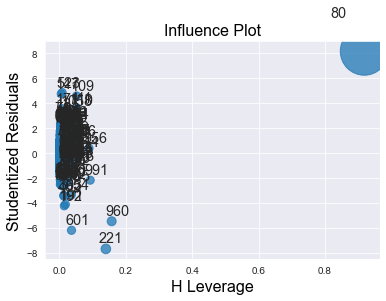

In [140]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_0)
plt.show() 

In [141]:
k = toyotacorrola.shape[1]
n = toyotacorrola.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff 

0.08147632311977715

In [142]:
toyotacorrola[toyotacorrola.index.isin([221,960,991,80])] 

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
80,81,45,18950,25,8,2002,20019,1,110,1,...,1,1,1,0,0,0,0,0,0,0
221,223,117,12450,44,1,2001,74172,1,110,1,...,1,1,1,0,0,0,1,0,0,0
960,964,302,9390,66,3,1999,50806,1,86,0,...,0,0,0,0,0,0,0,0,0,0
991,996,308,7950,58,11,1999,43000,2,110,1,...,1,1,1,0,0,0,0,0,0,0


In [143]:
#Improving the model

In [144]:
#Load th data
#Discard the data points which are influencers & reasign the row number(reset_index[])
new_toyotacorrola=toyotacorrola.drop(toyotacorrola.index[[221,960,991,80]],axis=0).reset_index()
new_toyotacorrola

,index,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,0,13500,23,10,2002,46986,0,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,0,13750,23,10,2002,72937,0,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,1,13950,24,9,2002,41711,0,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,0,14950,26,7,2002,48000,0,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,2,13750,30,3,2002,38500,0,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1431,1438,213,7500,69,12,1998,20544,1,86,...,1,1,1,0,1,1,1,0,0,0
1428,1432,1439,230,10845,72,9,1998,19000,1,86,...,0,0,1,0,0,1,1,0,0,0
1429,1433,1440,230,8500,71,10,1998,17016,1,86,...,0,0,1,0,0,0,1,0,0,0
1430,1434,1441,230,7250,70,11,1998,16916,1,86,...,0,0,0,0,0,0,1,0,0,0


In [145]:
#Drop the original index
new_toyotacorrola=new_toyotacorrola.drop(['index'],axis=1)
new_toyotacorrola

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,0,13500,23,10,2002,46986,0,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,0,13750,23,10,2002,72937,0,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,1,13950,24,9,2002,41711,0,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,0,14950,26,7,2002,48000,0,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,2,13750,30,3,2002,38500,0,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,1438,213,7500,69,12,1998,20544,1,86,1,...,1,1,1,0,1,1,1,0,0,0
1428,1439,230,10845,72,9,1998,19000,1,86,0,...,0,0,1,0,0,1,1,0,0,0
1429,1440,230,8500,71,10,1998,17016,1,86,0,...,0,0,1,0,0,0,1,0,0,0
1430,1441,230,7250,70,11,1998,16916,1,86,1,...,0,0,0,0,0,0,1,0,0,0


In [146]:
#BUILD A MODEL
#Generate R-squared & AIC values for cc & Doors
#Whichever independent variables having high R-squared value & lower AIC value then inculde it.

In [147]:
final_ml_cc=smf.ols('Price~Age+KM+HP+Doors+Gears+Quarterly_Tax+Weight',data=new_toyotacorrola).fit()
(final_ml_cc.rsquared,final_ml_cc.aic) 

(0.8729815365640281, 24595.706360132986)

In [148]:
final_ml_Doors=smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=new_toyotacorrola).fit()
(final_ml_Doors.rsquared,final_ml_Doors.aic) 

(0.8848553771893776, 24455.164826089414)

In [149]:
#Cooks distance

In [150]:
model_influence_Doors=final_ml_Doors.get_influence()
(c_Doors,_)=model_influence_Doors.cooks_distance 

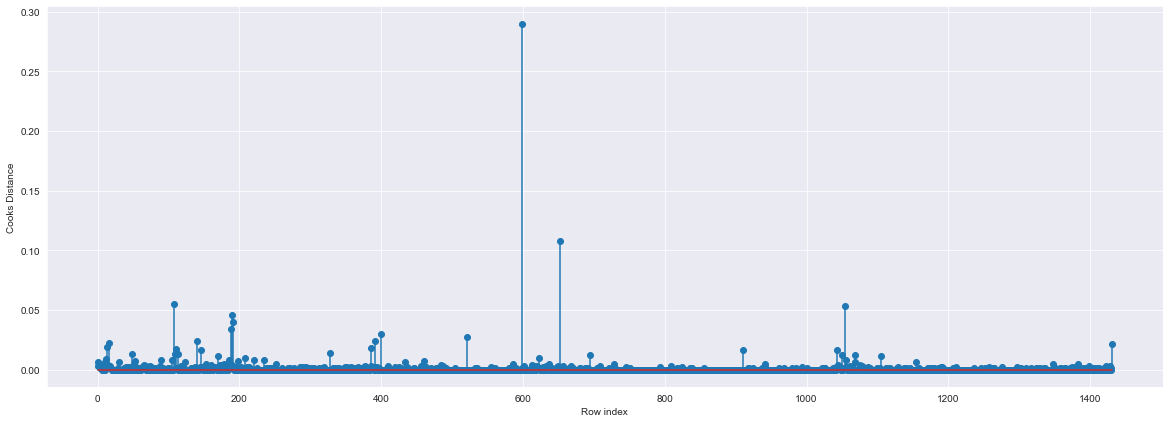

In [151]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_Doors,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [152]:
#index of the data points where c is more than 0.0814
(np.argmax(c_Doors),np.max(c_Doors))

(599, 0.29025782860265575)

In [153]:
#Improve the model

In [154]:
#Load th data
#Discard the data points which are influencers & reasign the row number(reset_index[])
new_toyotacorrola1=new_toyotacorrola.drop(new_toyotacorrola.index[[599]],axis=0).reset_index()
new_toyotacorrola1

,index,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,0,13500,23,10,2002,46986,0,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,0,13750,23,10,2002,72937,0,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,1,13950,24,9,2002,41711,0,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,0,14950,26,7,2002,48000,0,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,2,13750,30,3,2002,38500,0,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1427,1438,213,7500,69,12,1998,20544,1,86,...,1,1,1,0,1,1,1,0,0,0
1427,1428,1439,230,10845,72,9,1998,19000,1,86,...,0,0,1,0,0,1,1,0,0,0
1428,1429,1440,230,8500,71,10,1998,17016,1,86,...,0,0,1,0,0,0,1,0,0,0
1429,1430,1441,230,7250,70,11,1998,16916,1,86,...,0,0,0,0,0,0,1,0,0,0


In [155]:
#Drop the original index
new_toyotacorrola1=new_toyotacorrola1.drop(['index'],axis=1)
new_toyotacorrola1

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,0,13500,23,10,2002,46986,0,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,0,13750,23,10,2002,72937,0,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,1,13950,24,9,2002,41711,0,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,0,14950,26,7,2002,48000,0,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,2,13750,30,3,2002,38500,0,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426,1438,213,7500,69,12,1998,20544,1,86,1,...,1,1,1,0,1,1,1,0,0,0
1427,1439,230,10845,72,9,1998,19000,1,86,0,...,0,0,1,0,0,1,1,0,0,0
1428,1440,230,8500,71,10,1998,17016,1,86,0,...,0,0,1,0,0,0,1,0,0,0
1429,1441,230,7250,70,11,1998,16916,1,86,1,...,0,0,0,0,0,0,1,0,0,0


In [156]:
#Build model
final_ml_Doors1=smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=new_toyotacorrola1).fit()
(final_ml_Doors1.rsquared,final_ml_Doors1.aic) 

(0.888784950369783, 24388.615674596913)

In [157]:
#Cooks distance
model_influence_Doors1=final_ml_Doors1.get_influence()
(c_Doors1,_)=model_influence_Doors1.cooks_distance 

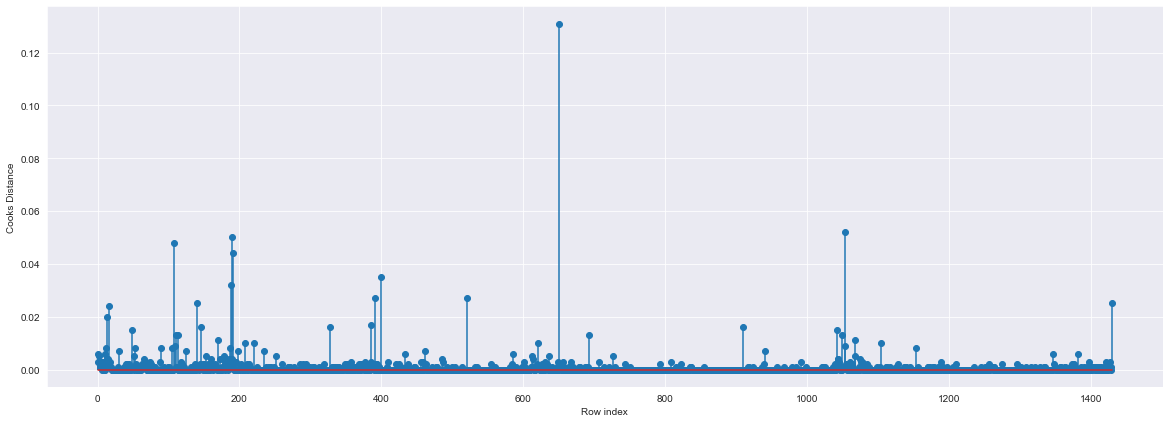

In [158]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_Doors1,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance'); 

In [159]:
#index of the data points where c is more than 0.0814
(np.argmax(c_Doors1),np.max(c_Doors1))

(651, 0.13121697792572098)

In [160]:
#Improve the model
#Load th data
#Discard the data points which are influencers & reasign the row number(reset_index[])
new_toyotacorrola2=new_toyotacorrola1.drop(new_toyotacorrola1.index[[651]],axis=0).reset_index()
new_toyotacorrola2 

,index,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0,1,0,13500,23,10,2002,46986,0,90,...,1,1,1,0,0,0,1,0,0,0
1,1,2,0,13750,23,10,2002,72937,0,90,...,1,0,1,0,0,0,1,0,0,0
2,2,3,1,13950,24,9,2002,41711,0,90,...,0,0,1,0,0,0,1,0,0,0
3,3,4,0,14950,26,7,2002,48000,0,90,...,0,0,1,0,0,0,1,0,0,0
4,4,5,2,13750,30,3,2002,38500,0,90,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1426,1438,213,7500,69,12,1998,20544,1,86,...,1,1,1,0,1,1,1,0,0,0
1426,1427,1439,230,10845,72,9,1998,19000,1,86,...,0,0,1,0,0,1,1,0,0,0
1427,1428,1440,230,8500,71,10,1998,17016,1,86,...,0,0,1,0,0,0,1,0,0,0
1428,1429,1441,230,7250,70,11,1998,16916,1,86,...,0,0,0,0,0,0,1,0,0,0


In [161]:
#Drop the original index
new_toyotacorrola2=new_toyotacorrola2.drop(['index'],axis=1)
new_toyotacorrola2 

,Id,Model,Price,Age,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,0,13500,23,10,2002,46986,0,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,0,13750,23,10,2002,72937,0,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,1,13950,24,9,2002,41711,0,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,0,14950,26,7,2002,48000,0,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,2,13750,30,3,2002,38500,0,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1425,1438,213,7500,69,12,1998,20544,1,86,1,...,1,1,1,0,1,1,1,0,0,0
1426,1439,230,10845,72,9,1998,19000,1,86,0,...,0,0,1,0,0,1,1,0,0,0
1427,1440,230,8500,71,10,1998,17016,1,86,0,...,0,0,1,0,0,0,1,0,0,0
1428,1441,230,7250,70,11,1998,16916,1,86,1,...,0,0,0,0,0,0,1,0,0,0


In [162]:
#Build model
final_ml_Doors2=smf.ols('Price~Age+KM+HP+cc+Gears+Quarterly_Tax+Weight',data=new_toyotacorrola2).fit()
(final_ml_Doors2.rsquared,final_ml_Doors2.aic) 

(0.8905110970526983, 24349.126453878176)

In [163]:
#Cooks distance
model_influence_Doors2=final_ml_Doors2.get_influence()
(c_Doors2,_)=model_influence_Doors2.cooks_distance 

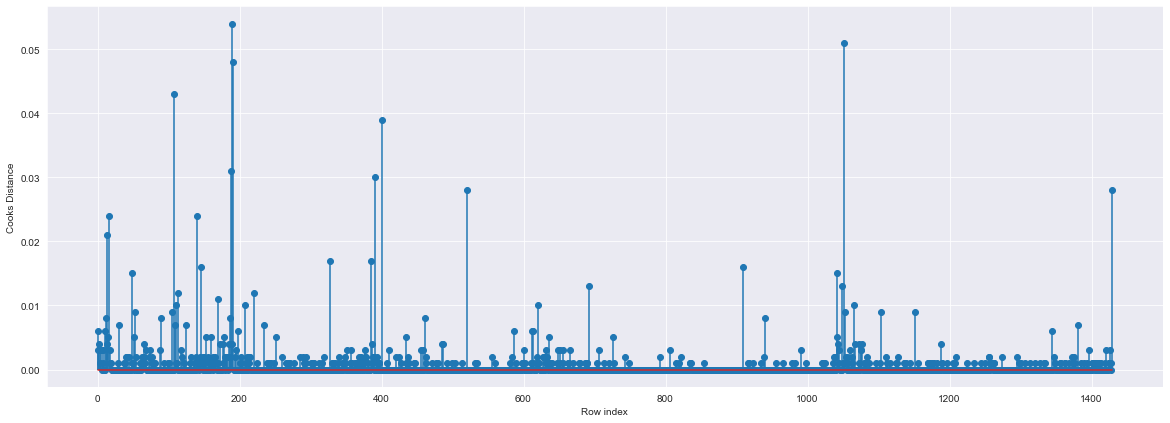

In [164]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_Doors2,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [165]:
#index of the data points where c is more than 0.0814
(np.argmax(c_Doors2),np.max(c_Doors2))

(190, 0.054186040454090686)

In [166]:
#Prepairing a Model for making prediction of Price by including [Doors] variable based on its (final_ml_Doors2) R-squared value & AIC Value
model6=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight+Doors',data= new_toyotacorrola2).fit()
model6

In [167]:
#This model is giving 88.01% accuracy which is greater than model_0[R-squared=86.40%] for making prediction 
(model6.rsquared,model6.aic)

(0.8801593454516885, 24478.312339895547)

In [168]:
#Prepairing a Model
#Finally we decided this equation is good for prediting price based on its accuracy
model=smf.ols('Price~Age+KM+HP+Gears+Quarterly_Tax+Weight+Doors',data= new_toyotacorrola2).fit()
model

In [171]:
#Prediction for Profit
pred_Price = model.predict(pd.DataFrame(new_toyotacorrola2.iloc[:,:]))
pred_Price  

0       16783.924284
1       16215.072743
2       16786.727954
3       16423.220767
4       16312.792185
            ...     
1425     8891.659018
1426     8321.764915
1427     8478.080097
1428     8593.097591
1429    11437.538031
Length: 1430, dtype: float64